## Partie 1 : Traitement de données
Notre objectif est de manipuler et de traiter le jeu de données (contenu dans le fichier `songs.csv`) des chansons les plus écoutées sur Spotify en 2024. Nos traitement serviront ensuite à entraîner un modèle simple de régression linéaire pour la prédiction du nombre total d'écoutes d'une chanson sur Spotify.

### Somaire
1. [Chargement du jeu de données](#1-chargement-du-jeu-de-données)
2. [Exploration des données](#2-exploration-des-données)
3. [Nettoyage des données](#3-nettoyage-des-données)
4. [Extraction de données](#4-extraction-de-données)
5. [Conversion de données](#5-conversion-des-données)
6. [Visualisation de données](#6-visualisation-de-données)
7. [Matrice de corrélation](#7-matrice-de-corrélation)
8. [Entraînement d'un modèle de régression](#8-entraînement-dun-modèle-de-régression-linéaire)

#### Installation et importation des librairies
Avant de commencer, nous devons lancer la cellule ci-bas afin de s'assurer que nous avons accès aux  librairies nécessaires.

In [95]:


import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

#### 1. Chargement du jeu de données
Chargez le jeu de données dans un [`DataFrame Pandas`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame), depuis le fichier CSV `songs.csv`.
Utilisez la méthode `read_csv()`.

In [96]:
# TODO: Charger le jeu de données dans un objet DataFrame.
df = pd.read_csv('songs.csv')



In [97]:
# TODO: Afficher les premières lignes du DataFrame pour comprendre la structure des données.
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


#### 2. Exploration des données
Affichez le nombre d'éléments (lignes) du jeu de données. Et, affichez les types de données de chaque colonne pour vérifier si nous avons besoin d'effectuer d'éventuelles nettoyage ou conversion.

In [98]:
# TODO: Afficher le nombre d'éléments.
print ("Le nombre d'element est ", len(df))
# TODO: Afficher les types de données de chaque colonne.
print(df.dtypes)


Le nombre d'element est  4600
Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                  object
Track Score                   float64
Spotify Streams                object
Spotify Playlist Count         object
Spotify Playlist Reach         object
Spotify Popularity            float64
YouTube Views                  object
YouTube Likes                  object
TikTok Posts                   object
TikTok Likes                   object
TikTok Views                   object
YouTube Playlist Reach         object
Apple Music Playlist Count    float64
AirPlay Spins                  object
SiriusXM Spins                 object
Deezer Playlist Count         float64
Deezer Playlist Reach          object
Amazon Playlist Count         float64
Pandora Streams                object
Pandora Track Stations         object
Soundcloud Streams  

#### 3. Nettoyage des données
Pour procéder au nettoyage de nos données, nous allons :
- Supprimer les colonnes inutiles ;
- Analyser les valeurs manquantes ;
- Gérer les valeurs manquantes.

Les méthodes utiles pour cette section sont : `drop()`, `isna()`, `dropna()`.

In [99]:
# TODO: Utiliser drop() pour supprimer les colonnes "ISRC" et "TIDAL Popularity".
df = df.drop('ISRC', axis=1)
df = df.drop('TIDAL Popularity', axis=1 )


In [100]:
# TODO: Pour chaque colonne, afficher la somme des valeurs manquantes (utiliser isna()).
missing_values = df.isna().sum()
print("La somme des valeurs manquantes pour chaque colonne est: ")
print(missing_values)



La somme des valeurs manquantes pour chaque colonne est: 
Track                            0
Album Name                       0
Artist                           5
Release Date                     0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
Explicit Track                  

In [101]:
# TODO: Supprimer les lignes contenant des valeurs manquantes (utiliser dropna()).
df.dropna(inplace=True)

# TODO: Afficher la nouvelle dimension du DataFrame.
print(df.shape)



(565, 27)


#### 4. Extraction de données
Nous souhaitons extraire l'année de sortie à partir de la date de sortie, et créer une nouvelle colonne "Release Year" basée sur cette donnée. Utilisez `to_datetime()` pour extraire l'année depuis la date et `apply()` pour appliquer l'extraction sur un ensemble de données.

In [102]:
# TODO: Créer une colonne "Release Year" contenant l'année de sortie pour chacune des chansons.

df['Release Date'] = pd.to_datetime(df['Release Date'])

#  Créer une colonne "Release Year" contenant l'année de sortie
df['Release Year'] = df['Release Date'].apply(lambda x: x.year)

df.head(len(df))


,Track,Album Name,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track,Release Year
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,1,725.4,"390,470,936","30,716","196,631,588",92.0,...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",0,2024
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,2,545.9,"323,703,884","28,113","174,597,137",92.0,...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",1,2024
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,3,538.4,"601,309,283","54,331","211,607,669",92.0,...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",0,2024
5,Lovin On Me,Lovin On Me,Jack Harlow,2023-11-10,6,410.1,"670,665,438","105,892","175,421,034",83.0,...,"4,654",86.0,"17,167,254",152.0,"138,529,362","50,982","9,438,601","4,517,131",1,2023
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,2024-05-23,10,330.6,"90,676,573","10,400","184,199,419",86.0,...,117,78.0,"10,800,098",92.0,"1,005,626",842,"3,679,709","666,302",1,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4522,Smells Like Teen Spirit,Nevermind (30th Anniversary Edition Super Deluxe),Nirvana,1991-09-24,"4,510",19.6,"2,021,910,364","410,054","113,406,994",77.0,...,287,256.0,"3,993,523",97.0,"691,979,509","317,966","13,047,851","12,775,440",0,1991
4536,Country Girl (Shake It For Me),Tailgates & Tanlines,Luke Bryan,2011-01-01,"4,530",19.6,"464,203,349","69,767","12,116,553",70.0,...,141,3.0,106,24.0,"514,853,161","931,824","1,017,184","2,256,949",0,2011
4557,The Way I Are,Shock Value (International Version),Timbaland,2007-01-01,"4,495",19.6,"858,734,232","177,813","63,919,947",78.0,...,347,31.0,"638,072",22.0,"404,463,590","176,142","1,896,764","10,984,658",0,2007
4576,Focus,Focus,Ariana Grande,2015-10-30,"4,551",19.5,"315,697,428","27,166","9,169,246",57.0,...,1,31.0,"227,649",5.0,"65,640,640","38,385","4,570,896","1,966,828",0,2015


#### 5. Conversion de données
Lors de l'étape d'[exploration de données](#2-exploration-des-données), nous avons remarqué que certaines colonnes sont de type `object` alors qu'elles représentent des données numériques. Nous allons donc convertir ces colonnes en `float` (utilisez `apply()` pour appliquer la conversion sur un ensemble de données).

Omettre de la conversion les colonnes : "Track", "Album Name", "Artist", "Release Date".

In [103]:
# TODO: Afficher les colonnes à convertir en 'float'.
excluded_columns = ['Track', 'Album Name', 'Artist', 'Release Date']
colonne_a_convertir=[]

for col in df.select_dtypes(include='object').columns:
    if col not in excluded_columns:
        try:
            # essayer de convertir la colonne a verifer et sassurer quil ny a plus de colonne non Nan
            df[col]=df[col].apply(lambda x:float(str(x).replace(',','')))
            colonne_a_convertir.append(col)

        except ValueError:
            #En cas derreur on continue sans ajouter la colonne
            continue
        
        
print("colonnes converties en float:",colonne_a_convertir)










colonnes converties en float: ['All Time Rank', 'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Reach', 'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts']


In [104]:
# TODO: Afficher les types de données de chaque colonne.
print(df.dtypes)

Track                                 object
Album Name                            object
Artist                                object
Release Date                  datetime64[ns]
All Time Rank                        float64
Track Score                          float64
Spotify Streams                      float64
Spotify Playlist Count               float64
Spotify Playlist Reach               float64
Spotify Popularity                   float64
YouTube Views                        float64
YouTube Likes                        float64
TikTok Posts                         float64
TikTok Likes                         float64
TikTok Views                         float64
YouTube Playlist Reach               float64
Apple Music Playlist Count           float64
AirPlay Spins                        float64
SiriusXM Spins                       float64
Deezer Playlist Count                float64
Deezer Playlist Reach                float64
Amazon Playlist Count                float64
Pandora St

#### 6. Visualisation de données
Nous aimerions visualiser nos données via :
- un graphique en secteur avec la proportion du nombre d'écoutes Spotify en 2024 par année de sortie ;
- un histogramme avec la proportion de chanson à contenu explicite par année de sortie ;
- un diagramme à barres avec le top 10 des chansons les plus écoutées sur Spotify en 2024.

Pour cela, utilisez les méthodes `pie()`, `histogram()` et `bar()` de Plotly Express (accessible via l'objet `px`).

In [105]:
# TODO: Afficher un DataFrame contenant seulement les colonnes "Release Year", "Spotify Streams".

df_filtered = df[["Release Year", "Spotify Streams"]]
# Afficher le DataFrame filtré
df_filtered.head(len(df_filtered))

,Release Year,Spotify Streams
0,2024,3.904709e+08
1,2024,3.237039e+08
2,2024,6.013093e+08
5,2023,6.706654e+08
9,2024,9.067657e+07
...,...,...
4522,1991,2.021910e+09
4536,2011,4.642033e+08
4557,2007,8.587342e+08
4576,2015,3.156974e+08


In [106]:
# TODO: Afficher un graphique en secteur représentant le nombre d'écoutes Spotify en 2024 par année de sortie.
fig_pie = px.pie(df, names='Release Year', values='Spotify Streams', title="Écoutes Spotify en 2024 par année de sortie")
fig_pie.show()

In [107]:
# TODO: Afficher un histogramme représentant la proportion de chanson à contenu explicite par année de sortie.
explicit_counts = df[["Explicit Track", "Release Year"]] 

# Transformer en DataFrame pour utiliser plotly
explicit_proportion_df = explicit_counts

#Afficher l'histogramme
fig = px.histogram(
    explicit_proportion_df,
    x="Release Year",
    color = "Explicit Track",
    title="Proportion de chansons explicites par année de sortie",
    labels={"Explicit Content Proportion": "Proportion (%) de contenu explicite"},
    
)

fig.show()

In [108]:
# TODO : Afficher un diagramme à barres avec le top 10 des chansons les plus écoutées en 2024.


df_plus_ecoutés= df[["Track","Spotify Streams"]].sort_values(by="Spotify Streams", ascending=False).head(10)

# Diagramme à barres
fig = px.bar(df_plus_ecoutés, x="Track", y="Spotify Streams",
             title="Top 10 des chansons les plus écoutées sur Spotify en 2024",
             text="Spotify Streams",  # Affiche le nombre d'écoutes sur chaque barre
             color_discrete_sequence=["#4C6EF5"])  

# Ajustements esthétiques
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(yaxis_title="Spotify Streams", xaxis_title="Track", 
                  title_x=0.5,  # Centrer le titre
                  plot_bgcolor="rgba(0,0,0,0)",  # Fond transparent
                  xaxis_tickangle=-45)  # Inclinaison des noms de chansons

fig.show()


#### 7. Matrice de corrélation
Afin de comprendre la relation entre les différentes colonnes numériques, nous voulons construire une matrice de corrélation. Cette matrice nous permet de mesurer le lien de dépendance entre chaque colonne 1 à 1.

Utilisez la méthode `corr()` sur les colonnes numériques du DataFrame pour construire une matrice, et affichez la matrice avec `heatmap()` de Seaborn (accessible via l'objet `sns`).

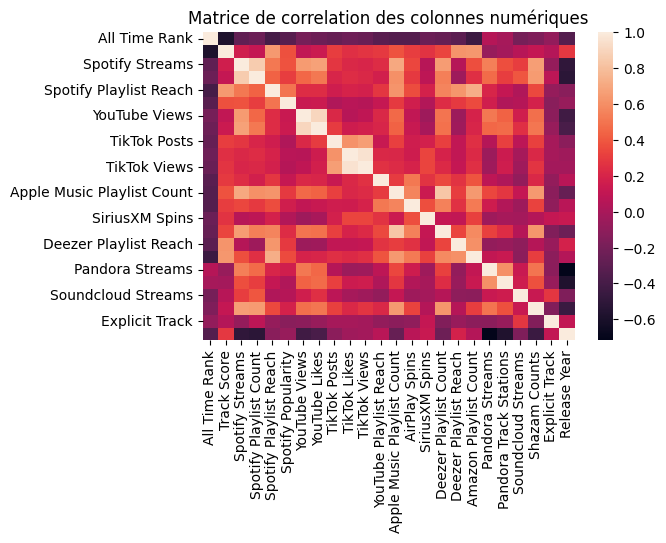

In [ ]:
# TODO: Afficher la matrice de corrélation entre les colonnes numériques du jeu de données.
#Selection numerique des colonnes pour la matrice de correlation
numeric_columns=df.select_dtypes(include=['number']).columns

#Calul de la matrice de correlation
matrice_correlation=df[numeric_columns].corr()


#Affichage de la matricce de correlation avec un heatmap de Seaborngit


plt.figure(figsize=(6,4))
sns.heatmap(matrice_correlation)
plt.title('Matrice de correlation des colonnes numériques')
plt.show()

#### 8. Entraînement d'un modèle de régression linéaire
Nous allons procéder à l'entraînement d'un modèle de regression linéaire pour prédire le nombre d'écoutes d'une chanson sur Spotify.

Cela consiste à apprendre d'une relation entre des données d'entrée et des résultats souhaités (ici on parle d'une relation entre toutes les colonnes décrivant une chanson et la colonne "Spotify Streams"). 

On veut diviser nos données en 2 ensembles distincts afin d'utiliser une partie pour que notre modèle apprenne des relations entre les entrées et le résulat, et l'autre partie pour tester la performance de notre modèle.

In [110]:

# TODO: Compléter data_test et data_train. Séparer le jeu de données de base en 2, 
#       on utilise la 1ère moitié pour initialiser data_train et l'autre pour data_test.
#       Les champs X correspondent aux données d'entrée (toutes les colonnes numériques sauf "Spotify Streams").
#       Les champs Y correspondent au résultat souhaité (soit la colonne "Spotify Streams").

# Separation du jeu de données en deux parties
mid=len(df)//2
print(mid)


data_test={
    "X":df.iloc[mid:].drop(columns=["Spotify Streams"]).select_dtypes(include='number'),
    "Y":df.iloc[mid:]["Spotify Streams"]
}

data_train={
    "X":df.iloc[:mid].drop(columns=["Spotify Streams"]).select_dtypes(include='number'),
    "Y":df.iloc[:mid]["Spotify Streams"]
}

# Verification
print(len(data_test["X"]))
print(len(data_train["X"]))





282
283
282


In [111]:
regression = linear_model.LinearRegression() # Instanciation du modèle de régression linéaire.
# TODO: Entraîner le modèle en appelant la méthode fit() sur la regression,
#       et en passant les données entraînements (entrées et résultat attendu) à cette méthode.


regression.fit(X=data_train["X"], y=data_train["Y"])



# TODO: Faire des prédictions de résultat à partir des données d'entrée de test,
#       en appelant la méthode predict() sur la regression.
#       Mettre les prédictions dans data_test["Y_pred"].
data_test["Y_pred"]=regression.predict(data_test["X"])

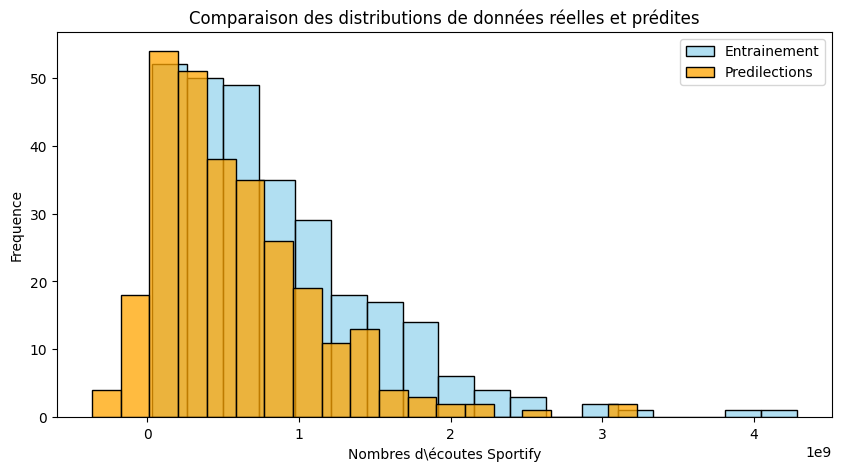

In [112]:
# TODO: Comparer la distribution des données prédites avec celles d'entraînement via un histogramme.
#Creation d'un histogramme pour les données réeles d'entrainement
#Creation d'un histogramme pour separer les distributions
plt.figure(figsize=(10,5))

#Histogrammes des valeurs réelles d'entrainement
sns.histplot(data_train["Y"],label='Entrainement',edgecolor='black', color='skyblue', alpha=0.65)

#Histogramme des predilections de test<
sns.histplot(data_test["Y_pred"],label='Predilections',edgecolor='black',color='orange')

plt.xlabel('Nombres d\écoutes Sportify')
plt.ylabel('Frequence')
plt.title('Comparaison des distributions de données réelles et prédites')
plt.legend()
plt.show()





